# Initial Capstone EDA - Channel Level
#### Sierra St John

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the channel dataset
yt_df = pd.read_csv('~/Desktop/ChannelExport.csv')

In [2]:
yt_df.shape

(7470, 18)

In [3]:
print(yt_df.isna().sum())

Channel Name                           0
Channel Link                           0
Channel Id                             0
Publish Date                           0
Country                                0
Language                               0
Subscribers                            0
Avg Subscribers Growth Per Month    1169
Total Views                            0
Avg Views Per Video                    0
Videos                                 0
Last Upload Time                       1
Category                               0
Last Video ID                          1
Last Video Title                       1
Keywords                            1536
Last Updated                           0
Has Email                              0
dtype: int64


In [4]:
yt_df.dtypes

Channel Name                         object
Channel Link                         object
Channel Id                           object
Publish Date                         object
Country                              object
Language                             object
Subscribers                           int64
Avg Subscribers Growth Per Month    float64
Total Views                           int64
Avg Views Per Video                   int64
Videos                                int64
Last Upload Time                     object
Category                             object
Last Video ID                        object
Last Video Title                     object
Keywords                             object
Last Updated                         object
Has Email                            object
dtype: object

In [5]:
# Convert the Date to datetime
yt_df['Publish Date'] = pd.to_datetime(yt_df['Publish Date'])
yt_df['Last Upload Time'] = pd.to_datetime(yt_df['Last Upload Time'])
yt_df['Last Updated'] = pd.to_datetime(yt_df['Last Updated'])
yt_df.dtypes

Channel Name                                object
Channel Link                                object
Channel Id                                  object
Publish Date                        datetime64[ns]
Country                                     object
Language                                    object
Subscribers                                  int64
Avg Subscribers Growth Per Month           float64
Total Views                                  int64
Avg Views Per Video                          int64
Videos                                       int64
Last Upload Time                    datetime64[ns]
Category                                    object
Last Video ID                               object
Last Video Title                            object
Keywords                                    object
Last Updated                        datetime64[ns]
Has Email                                   object
dtype: object

In [6]:
yt_df.head()

,Channel Name,Channel Link,Channel Id,Publish Date,Country,Language,Subscribers,Avg Subscribers Growth Per Month,Total Views,Avg Views Per Video,Videos,Last Upload Time,Category,Last Video ID,Last Video Title,Keywords,Last Updated,Has Email
0,Unorthodox Individual,https://youtube.com/channel/UCgmi3mLsun1--VChY...,UCgmi3mLsun1--VChYUB-oGA,2018-09-09 04:02:00,United States,English,102000,3609.0,154928706,134977,999,2023-02-24 22:54:00,Film & Animation,SWxLVuMWUxc,I DEFINITELY Don\'t Recall This From Amphibia...,NaN,2023-02-25 02:08:00,NO
1,Yousif Mihyar,https://youtube.com/channel/UCGdw7tpU_qYGyyr3t...,UCGdw7tpU_qYGyyr3tuty02g,2014-07-29 11:56:00,United States,English,84800,NaN,120110974,2569,999,2023-02-20 23:49:00,Entertainment,evucB5v9VE4,Would you go to my college?,"Tesla \""Funny pranks\"" Pranks \""Familly Channe...",2023-02-25 02:07:00,YES
2,Adam Celadin,https://youtube.com/channel/UCZOhMveylz2eyjIdG...,UCZOhMveylz2eyjIdG6SehJg,2006-03-04 19:17:00,United States,English,425000,769.0,68705466,25759,999,2023-02-24 13:15:00,Entertainment,k_rzEU9r1K0,Hollywood Throwing Knives? (Achilles) Unboxing...,"\""Knife Throwing\"" Trick-Shots Challenges \""Ri...",2023-02-24 21:37:00,YES
3,Dirt Perfect,https://youtube.com/channel/UCvn8y5Gf090ljxf9x...,UCvn8y5Gf090ljxf9xbG5K3w,2014-04-07 00:02:00,United States,English,159000,3077.0,62102626,84119,999,2023-02-24 12:00:00,Entertainment,04KqKqy68BM,All new Volvo EC200EL loading some very large ...,"heavy equipment friendly dirt excavating \""log...",2023-02-24 20:46:00,YES
4,Misterhat,https://youtube.com/channel/UC5TkdUvFV_6jGjZkw...,UC5TkdUvFV_6jGjZkwZo62pg,2017-12-07 22:38:00,United States,English,85000,3205.0,33047254,5938,999,2023-02-25 03:15:00,Entertainment,FifpWF7_jWU,loudest sound in the universe 😳,"misterhat \""mr hat\""",2023-02-25 07:37:00,YES


# Look at Amount of Videos by Channel

In [6]:
vids_df = yt_df[['Channel Name','Videos']]
vids_df

,Channel Name,Videos
0,Unorthodox Individual,999
1,Yousif Mihyar,999
2,Adam Celadin,999
3,Dirt Perfect,999
4,Misterhat,999
...,...,...
7465,Olivia Kathryn,100
7466,Shawna Della-Ricca,100
7467,youluviyele TV,100
7468,Joyceful Tingles,100


In [7]:
df1 = vids_df[["Videos"]].median()
print('The median vids are',df1)

df2 = vids_df[["Videos"]].mean()
print('The mean vids are',df2)

The median vids are Videos    300.0
dtype: float64
The mean vids are Videos    368.589692
dtype: float64


In [15]:
px.histogram(title='Amount of Videos per Channel',data_frame = vids_df
            ,x = 'Videos',
             nbins = 100)

# Investigating Subscribers by Channel

In [12]:
subs_df = yt_df[['Channel Name','Subscribers','Videos']]
subs_df

,Channel Name,Subscribers,Videos
0,Unorthodox Individual,102000,999
1,Yousif Mihyar,84800,999
2,Adam Celadin,425000,999
3,Dirt Perfect,159000,999
4,Misterhat,85000,999
...,...,...,...
7465,Olivia Kathryn,96600,100
7466,Shawna Della-Ricca,64000,100
7467,youluviyele TV,120000,100
7468,Joyceful Tingles,75000,100


In [16]:
px.histogram(title='Amount of Subscribers per Channel',data_frame = subs_df,
             x = 'Subscribers',nbins = 350)

In [17]:
df5 = subs_df[["Subscribers"]].median()
print('The median subs are',df5)

df6 = subs_df[["Subscribers"]].mean()
print('The mean subs are',df6)

The median subs are Subscribers    178000.0
dtype: float64
The mean subs are Subscribers    444876.385542
dtype: float64


# Look at Avg Views by Vid by Channel

In [18]:
avg_views_vid = yt_df[['Channel Name','Avg Views Per Video','Videos']]
avg_views_vid

,Channel Name,Avg Views Per Video,Videos
0,Unorthodox Individual,134977,999
1,Yousif Mihyar,2569,999
2,Adam Celadin,25759,999
3,Dirt Perfect,84119,999
4,Misterhat,5938,999
...,...,...,...
7465,Olivia Kathryn,43755,100
7466,Shawna Della-Ricca,18971,100
7467,youluviyele TV,78723,100
7468,Joyceful Tingles,63611,100


In [20]:
px.histogram(title='Avg Views per Vid by Channel',data_frame = avg_views_vid
            ,x = 'Avg Views Per Video',
             nbins = 100)

In [21]:
df9 = avg_views_vid[["Avg Views Per Video"]].median()
print('The median Avg Views Per Video are',df9)

df10 = avg_views_vid[["Avg Views Per Video"]].mean()
print('The mean Avg Views Per Video are',df10)

The median Avg Views Per Video are Avg Views Per Video    39556.0
dtype: float64
The mean Avg Views Per Video are Avg Views Per Video    237400.290094
dtype: float64


# Look at Total Views

In [22]:
views_df = yt_df[['Channel Name','Total Views','Videos']]
views_df

,Channel Name,Total Views,Videos
0,Unorthodox Individual,154928706,999
1,Yousif Mihyar,120110974,999
2,Adam Celadin,68705466,999
3,Dirt Perfect,62102626,999
4,Misterhat,33047254,999
...,...,...,...
7465,Olivia Kathryn,5098621,100
7466,Shawna Della-Ricca,5076057,100
7467,youluviyele TV,5016754,100
7468,Joyceful Tingles,4412730,100


In [23]:
df13 = views_df[["Total Views"]].median()
print('The median views are',df13)

df14 = views_df[["Total Views"]].mean()
print('The mean views are',df14)

The median views are Total Views    35130653.5
dtype: float64
The mean views are Total Views    1.194141e+08
dtype: float64


In [24]:
px.histogram(title='Total Views by Channel',data_frame = views_df
            ,x = 'Total Views',
             nbins = 100)

# For reference, OneTake has 46,603,850 views

# Investigate Category Breakout

In [25]:
category_vid = yt_df[['Channel Name','Category']]
category_vid

,Channel Name,Category
0,Unorthodox Individual,Film & Animation
1,Yousif Mihyar,Entertainment
2,Adam Celadin,Entertainment
3,Dirt Perfect,Entertainment
4,Misterhat,Entertainment
...,...,...
7465,Olivia Kathryn,Entertainment
7466,Shawna Della-Ricca,Entertainment
7467,youluviyele TV,Entertainment
7468,Joyceful Tingles,Entertainment


In [26]:
counts = category_vid.groupby('Category')['Channel Name'].count()
counts = pd.DataFrame(counts)
counts

,Channel Name
Category,
Entertainment,6157
Film & Animation,1313


#### Just under 6% of of channels are not tagged "Entertainment"

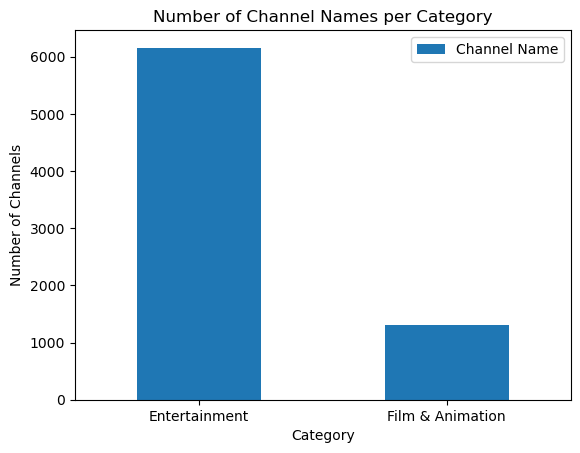

In [27]:
counts.plot(kind='bar', rot=0)
plt.title('Number of Channel Names per Category')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.show()

# Getting 100 UC Codes for Video Scrape

In [28]:
# Load the channel code dataset
yt_codes = pd.read_csv('~/Desktop/uc_codes_left.csv')
yt_codes

,UC0SFwkGlQonlP69Lb9Gdb-w
0,UC0sx2UCRrPrZ_98J6oRtbwQ
1,UC0t2mVaEL-zRDr7U96e3sAg
2,UC0t3ejibUQ91s12D4NAaU7A
3,UC0TVtsKEesOxuna9AU6IebA
4,UC0uGC_EBwAxw3ljqeGjy2qw
...,...
10914,UCNcUc5v0Kt5afE_jcbbZUBQ
10915,UC6sqpmfBwngFZQPPzFjDGTw
10916,UCCDblMhWlTMhhSGJna1YFIg
10917,UCWdttCSNPfNu_jRAO7P60eg


In [29]:
# Convert codes to a series
my_series = yt_codes.squeeze()
my_series

0        UC0sx2UCRrPrZ_98J6oRtbwQ
1        UC0t2mVaEL-zRDr7U96e3sAg
2        UC0t3ejibUQ91s12D4NAaU7A
3        UC0TVtsKEesOxuna9AU6IebA
4        UC0uGC_EBwAxw3ljqeGjy2qw
                   ...           
10914    UCNcUc5v0Kt5afE_jcbbZUBQ
10915    UC6sqpmfBwngFZQPPzFjDGTw
10916    UCCDblMhWlTMhhSGJna1YFIg
10917    UCWdttCSNPfNu_jRAO7P60eg
10918    UCifQBGR3dEDocPHmWhajHMA
Name: UC0SFwkGlQonlP69Lb9Gdb-w, Length: 10919, dtype: object

In [ ]:
np.random.choice(my_series, replace=False)

In [452]:
pd.DataFrame({'channel_codes': grouped_items[:, 0]}).to_csv("/tmp/out.csv")

In [454]:
my_series[:100].shape

(100,)

In [457]:
import os
import pandas as pd
import numpy as np

# Set up directory and file paths
output_dir = 'yt_channels_100'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
input_file = '~/Desktop/uc_codes_left.csv'

# Load the input series from a csv file
my_series = pd.read_csv(input_file, header=None, squeeze=True)

num_channels = my_series.shape[0]

interval = 100

ind = 0
while ind * interval < num_channels:
    cur_channels = my_series[ind * interval: (ind * interval) + interval]
    cur_df = pd.DataFrame({'channel_codes': cur_channels})
    fn = f'{output_dir}/group_{ind}.csv'
    cur_df.to_csv(fn, index=False, header=False)
    
    ind += 1

/var/folders/jl/nys4dbvd76v1jndmww_s95z40000gn/T/ipykernel_8469/3808365650.py:13: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.



